In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
from qp import get_stocks # 1/PBR + GP/A
#from ncav import get_stocks # NCAV
#from super_value import get_stocks
#from super_quality import get_stocks

importing Jupyter notebook from qp.ipynb
importing Jupyter notebook from common.ipynb


In [3]:
MODEL_NAME = 'qp'
DATA_DIR = 'data/daily/8-1'

In [4]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [5]:
df_account

,start_date,end_date,filepath
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv


In [6]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date, False), axis=1)

2002-08-01 선정 기업 수 30
2003-08-01 선정 기업 수 30
2004-08-02 선정 기업 수 30
2005-08-01 선정 기업 수 30
2006-08-01 선정 기업 수 30
2007-08-01 선정 기업 수 30
2008-08-01 선정 기업 수 30
2009-08-03 선정 기업 수 30
2010-08-02 선정 기업 수 30
2011-08-01 선정 기업 수 30
2012-08-01 선정 기업 수 30
2013-08-01 선정 기업 수 30
2014-08-01 선정 기업 수 30
2015-08-03 선정 기업 수 30
2016-08-01 선정 기업 수 30
2017-08-01 선정 기업 수 30
2018-08-01 선정 기업 수 30


In [7]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')
df_account['delisted'] = 0
df_account['delisted_stocks'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률, 상장폐지 기업 수를 구한다.
        delisted = 0 # 상장폐지 기업 수
        delisted_stocks  = []
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) 
                end_price = end_price.iloc[0]
                
            if end_price == 0: # 가격 정보가 없을 경우 상폐
                delisted += 1
                delisted_stocks.append(stock)
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        df_account.at[i, 'delisted'] = delisted
        df_account.at[i, 'delisted_stocks'] = delisted_stocks
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-08-01 ~ 2003-08-01 : 0.8926984801425172
2003-08-01 ~ 2004-08-02 : 1.2068305522682943
2004-08-02 ~ 2005-08-01 : 2.953901218434903
2005-08-01 ~ 2006-08-01 : 1.2105357536862382
2006-08-01 ~ 2007-08-01 : 2.2486033897210675
2007-08-01 ~ 2008-08-01 : 0.8822539221569293
2008-08-01 ~ 2009-08-03 : 1.3142932790471689
2009-08-03 ~ 2010-08-02 : 1.384187251930768
2010-08-02 ~ 2011-08-01 : 2.1981265337515343
2011-08-01 ~ 2012-08-01 : 1.684864608648757
2012-08-01 ~ 2013-08-01 : 1.2740049130486464
2013-08-01 ~ 2014-08-01 : 1.299534840359533
2014-08-01 ~ 2015-08-03 : 2.0498502973575077
2015-08-03 ~ 2016-08-01 : 1.5540146920784954
2016-08-01 ~ 2017-08-01 : 1.0256472165808335
2017-08-01 ~ 2018-08-01 : 1.8407928040198493
2018-08-01 ~ 2019-08-01 : 1.2932781105476583


In [8]:
df_account['total'] = df_account['yield'].cumprod()

In [9]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [10]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [11]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [12]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

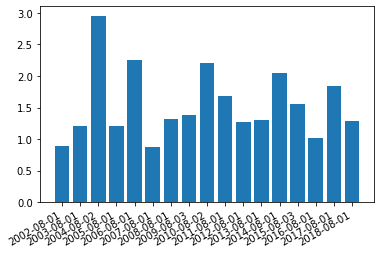

In [13]:
fig, ax = plt.subplots()
plt.bar(df_account['start_date'], df_account['yield'])
fig.autofmt_xdate()
plt.show()

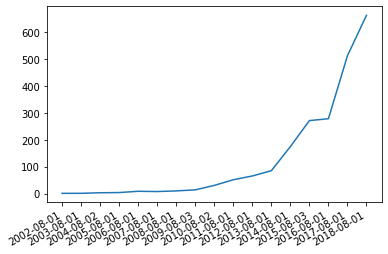

In [14]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

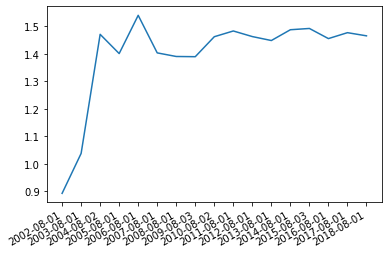

In [15]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [16]:
1 - min(df_account['yield'])

0.11774607784307067

In [17]:
max(df_account['yield'])

2.953901218434903

In [18]:
# 가격 정보가 없는 경우 상폐로 처리했음. 실제로 상폐까지는 아니고 거래정지인 경우가 있음
sum(df_account['delisted'])

11

In [19]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,delisted,delisted_stocks,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv,"[010600, 005610, 025880, 003230, 014570, 00409...",0.892698,"[0.8875739644970414, 0.6606129398410897, 0.905...",0,[],0.892698,0.892698,0.300000,1.426829,0.162202,027040,018680
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv,"[010600, 009460, 003680, 025880, 004540, 00409...",1.206831,"[0.7766666666666666, 0.7991803278688525, 2.113...",0,[],1.077336,1.037948,0.400000,5.214724,0.377982,006090,018680
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv,"[010600, 005320, 032860, 016920, 004090, 00946...",2.953901,"[1.6251788268955651, 1.3008739076154807, 3.082...",0,[],3.182344,1.470897,1.000000,20.588235,1.256545,050050,045060
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv,"[010600, 017680, 046310, 005320, 014470, 00044...",1.210536,"[2.183098591549296, 1.812169312169312, 1.36842...",1,[005320],3.852341,1.400978,0.733333,3.692130,0.000000,014470,005320
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv,"[068290, 025880, 000440, 016920, 008110, 04506...",2.248603,"[2.0201729106628243, 1.8651162790697675, 1.607...",0,[],8.662386,1.540024,1.000000,5.096045,1.235023,004090,024940
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv,"[017680, 006060, 010600, 045060, 079650, 02588...",0.882254,"[0.5589519650655022, 0.7112195121951219, 0.043...",0,[],7.642424,1.403477,0.266667,2.293144,0.043750,009470,010600
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv,"[011080, 005320, 006060, 078520, 014570, 04631...",1.314293,"[0.6292517006802721, 0.9861111111111112, 1.618...",0,[],10.044387,1.390375,0.400000,3.630252,0.333333,078520,042510
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv,"[011080, 017680, 010470, 079650, 007980, 08879...",1.384187,"[0.9081081081081082, 1.1848101265822786, 1.621...",0,[],13.903312,1.389600,0.800000,3.733333,0.181614,048770,011300
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv,"[011080, 033340, 032860, 088790, 011090, 07965...",2.198127,"[0.8857142857142857, 1.0733333333333333, 22.61...",0,[],30.561239,1.462241,0.666667,22.615385,0.106838,032860,017680
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv,"[011080, 038320, 033340, 044380, 091440, 01109...",1.684865,"[1.7473118279569892, 0.0, 1.1770186335403727, ...",1,[038320],51.491550,1.483111,0.566667,9.172414,0.000000,010600,038320


In [ ]:
#df_account.to_csv('log/' + MODEL_NAME + '-' + os.path.basename(DATA_DIR) + '.csv', index=False)